<a href="https://colab.research.google.com/github/Kwadex/hello-world/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTION 1 - Dealing with Missing Data**

In [3]:
import pandas as pd

In [17]:
import gdown

In [18]:
file_id = "16Gu4pGrQ6mXjIOiSVVl5v8pjAdSDuJK0"

In [23]:
house_prices_path = "house_prices.csv"

In [28]:
gdown.download(id=file_id, output=house_prices_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16Gu4pGrQ6mXjIOiSVVl5v8pjAdSDuJK0
To: /content/house_prices.csv
100%|██████████| 925k/925k [00:00<00:00, 9.28MB/s]


'house_prices.csv'

In [29]:
house_prices_df = pd.read_csv(house_prices_path)

In [114]:
house_prices_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [30]:
missing_data = house_prices_df.isnull().sum()

In [31]:
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

In [32]:
missing_data_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': (missing_data.values / len(house_prices_df)) * 100
})

In [33]:
missing_data_df.head(20)

,Column,Missing Count,Missing Percentage
0,society,5502,41.306306
1,balcony,609,4.572072
2,bath,73,0.548048
3,size,16,0.120120
4,location,1,0.007508


SUMMARY

Society – MNAR (Missing Not at Random)
The missing society names are probably not random. They might be missing because the properties are in unregistered or informal areas, or maybe the seller chose not to share that info on purpose. So, the missing data is likely tied to the value itself.

Balcony – MAR (Missing At Random)
The number of balconies seems to depend on other details like how big the house is or how many bedrooms it has. In cheaper or smaller listings, the balcony info might just be skipped because it’s considered less important.

Bath – MAR (Missing At Random)
Missing bathroom data probably relates to other known features—like the number of bedrooms or the size of the property. If there's a pattern (like smaller homes not listing the number of bathrooms), it’s not random—it depends on those other variables.

Size – MAR (Missing At Random)
When the size is missing, it’s likely because of the type of property or where it’s located. For example, if it’s a standard apartment where the size is typically known, the agent might leave it out assuming it's understood.

Location - MCAR (Missing Completely At Random)
There is only one missing value related to location, due to its importance in housing/real estate, it would have been omitted by accident.

# **QUESTION NUMBER 2 - Data Aggregation and Grouping**

In [35]:
file_id = "https://raw.githubusercontent.com/nytimes/covid-19-data/refs/heads/master/us-counties-2020.csv"

In [36]:
covid_data_url = file_id

In [38]:
covid_df = pd.read_csv(covid_data_url)

In [39]:
covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [40]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [41]:
state_daily = covid_df.groupby(['state', 'date'])['cases'].sum().reset_index()

In [42]:
state_daily['new_cases'] = state_daily.groupby('state')['cases'].diff().fillna(0)

In [43]:
average_cases = state_daily.groupby('state')['new_cases'].mean().reset_index()
average_cases.rename(columns={'new_cases': 'average_daily_cases'}, inplace=True)

In [44]:
print(average_cases)

                       state  average_daily_cases
0                    Alabama          1228.639456
1                     Alaska           158.437288
2                    Arizona          1536.152493
3                   Arkansas           760.597973
4                 California          6748.125731
5                   Colorado          1111.182119
6                Connecticut           621.093645
7                   Delaware           194.104730
8       District of Columbia            96.606667
9                    Florida          4324.526144
10                   Georgia          2111.681967
11                      Guam            28.366438
12                    Hawaii            71.289037
13                     Idaho           480.908163
14                  Illinois          2815.857143
15                   Indiana          1709.149502
16                      Iowa           942.170569
17                    Kansas           751.513333
18                  Kentucky           893.112957


We have transformed raw COVID-19 data and turned it into a summary of average daily case in different states.
See step by step process below:

1. Preparing the Data
First, we load the dataset and make sure the dates are in the right format so we can properly track changes over time.

2. Grouping and Calculating Cases
Then, we group the data by state and date to get the total number of cases reported each day in each state. From there, we calculate how many new cases appeared each day by finding the difference between one day and the next. Any missing numbers are filled in with zero to keep things clean.

3. Finding the Averages
After that, we work out the average number of new daily cases for every state. This gives us a simple way to compare how hard each state was hit on an average day.

4. The Final Output
In the end, we print a table showing each state alongside its average daily number of new cases.

QUESTION NUMBER 3 - Time Series Analysis

In [45]:
import numpy as np

In [46]:
import matplotlib as mpl

In [47]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [49]:
covid_df = pd.read_csv(covid_data_url)

In [93]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [94]:
ca_df = covid_df[covid_df['state'] == 'California']

In [95]:
ca_daily = ca_df.groupby('date')['cases'].sum().reset_index()

In [96]:
ca_daily['new_cases'] = ca_daily['cases'].diff().fillna(0)

In [97]:
ca_daily['date'] = pd.to_datetime(ca_daily['date'])

In [98]:
ca_daily.set_index('date', inplace=True)

In [84]:
ca_weekly = ca_daily['new_cases'].resample('W').sum().reset_index()

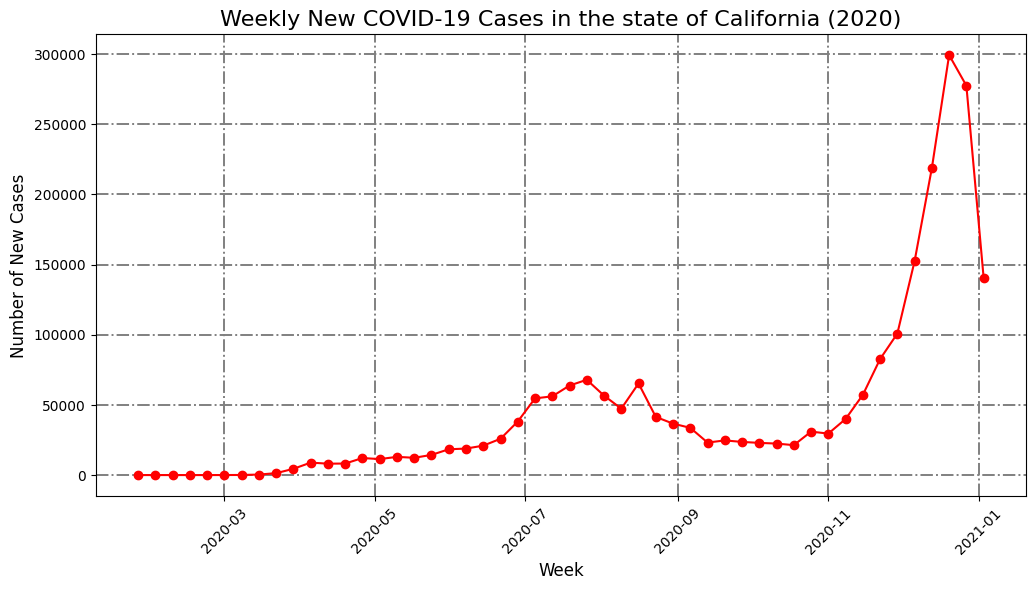

In [113]:
#visualisation#
plt.figure(figsize=(12,6))
plt.plot(ca_weekly['date'], ca_weekly['new_cases'],color = "red", marker='o', linestyle='-')
plt.title('Weekly New COVID-19 Cases in the state of California (2020)', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of New Cases', fontsize=12)
#plt.grid(True)
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
plt.xticks(rotation=45)
plt.show()